In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
class Main:
  #load
  def load_data(slef,path):
    ext=path.split('.')
    try:
      if ext[1]=='csv':
        return pd.read_csv(path)
      elif ext[1]=='xlsx':
        return pd.read_excel(path)
      elif ext[1]=='tsv':
        return pd.read_csv(path, sep='\t')
    except FileNotFoundError:
        print(f"No such file or directory: {path}")
#Merge For 2 Files
  def Merge(self,path1,path2):
    data1=self.load_data(path1)
    data2=self.load_data(path2)
    return pd.concat([data1,data2],axis=0)
#Columns
  def data_columns(self,data):
    return data.columns
#Info
  def info(self,data):
    return data.dtypes
#Describe Numerical
  def describe_numerical(self, data):
    return data[data.select_dtypes(include='number').columns].describe().transpose()
#Describe Object
  def describe_object(self, data):
    return data[data.select_dtypes(include='object').columns].describe().transpose()
#Null Data
  def null_data(self,data):
    df=pd.DataFrame()
    df['Number Of Null'],df['Precentage']=data.isna().sum(),(data.isna().sum()/len(data))*100
    return df
#Handel Missing
  def handle_missing_data(self,data,drop=False):
    if drop==True:
      data.dropna(inplace=True)
    else:
      col=data[data.isna()].columns
      for c in col:
          if data[c].dtype == 'object' or data[c].dtype == 'bool':
              mode_value = data[c].mode()[0]
              data[c].fillna(mode_value, inplace=True)
          elif data[c].dtype == 'int64' or data[c].dtype == 'float64':
              mean_value = data[c].mean()
              data[c].fillna(mean_value, inplace=True)
      return data
#Duplicate
  def duplicate_show(self,data):
    return data[data.duplicated()]
#Remove DUplicate
  def duplicate_handle(self,data):
    data.drop_duplicates(inplace=True)
    return data
#Histogram For Numerical Feature
  def numerical_visualization_hist(self,data):
    col=data.select_dtypes(include='number').columns
    plt.figure(figsize=(20, int(8 *np.ceil(len(col)/2))))
    for i, col_name in enumerate(col):
        plt.subplot(int(np.ceil(len(col)/2)),2,i+1)
        data[col_name].plot(kind='hist',color='red')
        plt.title(f"histogram for {col_name}",fontsize=20)
        plt.ylabel('Count',fontsize=15)
        plt.xlabel('Value',fontsize=15)
        plt.grid(True)
        plt.xticks(rotation=30)
#BoxPlot For Numerical Feature 
  def numerical_visualization_box(self,data):
    col=data.select_dtypes(include='number').columns
    plt.figure(figsize=(20, int(8 *np.ceil(len(col)/2))))
    for i, col_name in enumerate(col):
        plt.subplot(int(np.ceil(len(col)/2)),2,i+1)
        sns.boxplot(data[col_name],color='y')
        plt.title(f"BoxPlot for {col_name}",fontsize=20)
        plt.ylabel('Count',fontsize=15)
        plt.xlabel('Value',fontsize=15)
        plt.grid(True)
        plt.xticks(rotation=30)
#Violin For Numerical Feature
  def numerical_visualization_violin(self,data):
    col=data.select_dtypes(include='number').columns
    plt.figure(figsize=(20, int(8 *np.ceil(len(col)/2))))
    for i, col_name in enumerate(col):
        plt.subplot(int(np.ceil(len(col)/2)),2,i+1)
        sns.violinplot(data[col_name],color='y')
        plt.title(f"ViolinPlot for {col_name}",fontsize=20)
        plt.ylabel('Count',fontsize=15)
        plt.xlabel('Value',fontsize=15)
        plt.grid(True)
        plt.xticks(rotation=30)
#BarPlot For Categorical Feature
  def categorical_visualization_bar(self,data):
    col=data.select_dtypes(include='object').columns
    plt.figure(figsize=(20, int(8 *np.ceil(len(col)/2))))
    for i, col_name in enumerate(col):
        plt.subplot(int(np.ceil(len(col)/2)),2,i+1)
        if len(data[col_name].value_counts())>15:
            data[col_name].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',color=['r','b','y'])
            plt.title(f"BarPlot For top 20 values {col_name} to max 20",fontsize=20)
        else:
            data[col_name].value_counts().plot(kind='bar',color=['r','b','y'])
            plt.title(f"BarPlot for {col_name}",fontsize=20)             
        plt.ylabel('Count',fontsize=15)
        plt.xlabel('Value',fontsize=15)
        plt.grid(True)
        plt.xticks(rotation=30)
#PiePlot For Categorical Feature
  def categorical_visualization_pie(self,data):
    col=data.select_dtypes(include='object').columns
    plt.figure(figsize=(20, int(8 *np.ceil(len(col)/2))))
    for i, col_name in enumerate(col):
        plt.subplot(int(np.ceil(len(col)/2)),2,i+1)
        if len(data[col_name].value_counts())>15:
            plt.pie(data[col_name].value_counts().sort_values(ascending=False).head(20),labels=list(data[col_name].value_counts().sort_values(ascending=False).head(20).index),autopct ='%1.2f%%')
            plt.title(f"PiePlot for top 20 values {col_name} to max 20",fontsize=20)
        else:
            plt.pie(data[col_name].value_counts(),labels=list(data[col_name].value_counts().index),autopct ='%1.2f%%')
            plt.title(f"BarPlot for {col_name}",fontsize=20)             
        plt.xticks(rotation=30)  
#HeatMap For Numerical Feature
  def heatmap_for_numerical(self,data):
    da=data[data.select_dtypes(include='number').columns]
    plt.figure(figsize=(20,10))
    sns.heatmap(da.corr(),annot=True,cbar=False,cmap='RdBu')
    return da.corr()

In [7]:
obj=Main()

In [8]:
path1='International_Report_Departures.csv'
path2='International_Report_Passengers.csv'
#load Data
data=obj.Merge(path1,path2)
#or
'''
path=''
data=obj.load_data(path)
'''
data.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


In [9]:
#data columns
obj.data_columns(data)

Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')

In [10]:
#data info
obj.info(data)

data_dte        object
Year             int64
Month            int64
usg_apt_id       int64
usg_apt         object
usg_wac          int64
fg_apt_id        int64
fg_apt          object
fg_wac           int64
airlineid        int64
carrier         object
carriergroup     int64
type            object
Scheduled        int64
Charter          int64
Total            int64
dtype: object

In [11]:
#describe numerical columns
obj.describe_numerical(data)

,count,mean,std,min,25%,50%,75%,max
Year,1611793.0,2006.071955,8.625836,1990.0,1999.0,2007.0,2014.0,2020.0
Month,1611793.0,6.394415,3.469324,1.0,3.0,6.0,9.0,12.0
usg_apt_id,1611793.0,12796.642428,2631.487262,10010.0,11618.0,12892.0,13495.0,99999.0
usg_wac,1611793.0,43.307221,27.816062,1.0,22.0,33.0,74.0,93.0
fg_apt_id,1611793.0,13488.333256,1942.490729,10119.0,11793.0,13408.0,15084.0,16881.0
fg_wac,1611793.0,467.422460,290.041397,106.0,204.0,427.0,736.0,975.0
airlineid,1611793.0,20046.398490,492.656733,19386.0,19704.0,19977.0,20312.0,22067.0
carriergroup,1611793.0,0.583674,0.492949,0.0,0.0,1.0,1.0,1.0
Scheduled,1611793.0,2760.444285,6444.483975,0.0,1.0,58.0,1841.0,149898.0
Charter,1611793.0,84.281235,628.036673,0.0,0.0,0.0,1.0,58284.0


In [12]:
#describe object columns
obj.describe_object(data)

,count,unique,top,freq
data_dte,1611793,363,06/01/2019,6209
usg_apt,1611793,1022,MIA,195759
fg_apt,1611793,1669,YYZ,93298
carrier,1605941,734,AA,117372
type,1611793,2,Departures,930808


In [13]:
#Show null data
obj.null_data(data)

,Number Of Null,Precentage
data_dte,0,0.000000
Year,0,0.000000
Month,0,0.000000
usg_apt_id,0,0.000000
usg_apt,0,0.000000
usg_wac,0,0.000000
fg_apt_id,0,0.000000
fg_apt,0,0.000000
fg_wac,0,0.000000
airlineid,0,0.000000


In [14]:
#handle missing value
data=obj.handle_missing_data(data)

In [15]:
obj.null_data(data)

,Number Of Null,Precentage
data_dte,0,0.0
Year,0,0.0
Month,0,0.0
usg_apt_id,0,0.0
usg_apt,0,0.0
usg_wac,0,0.0
fg_apt_id,0,0.0
fg_apt,0,0.0
fg_wac,0,0.0
airlineid,0,0.0


In [16]:
#show duplicate data
obj.duplicate_show(data)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total


In [17]:
#duplicate handle
data=obj.duplicate_handle(data)

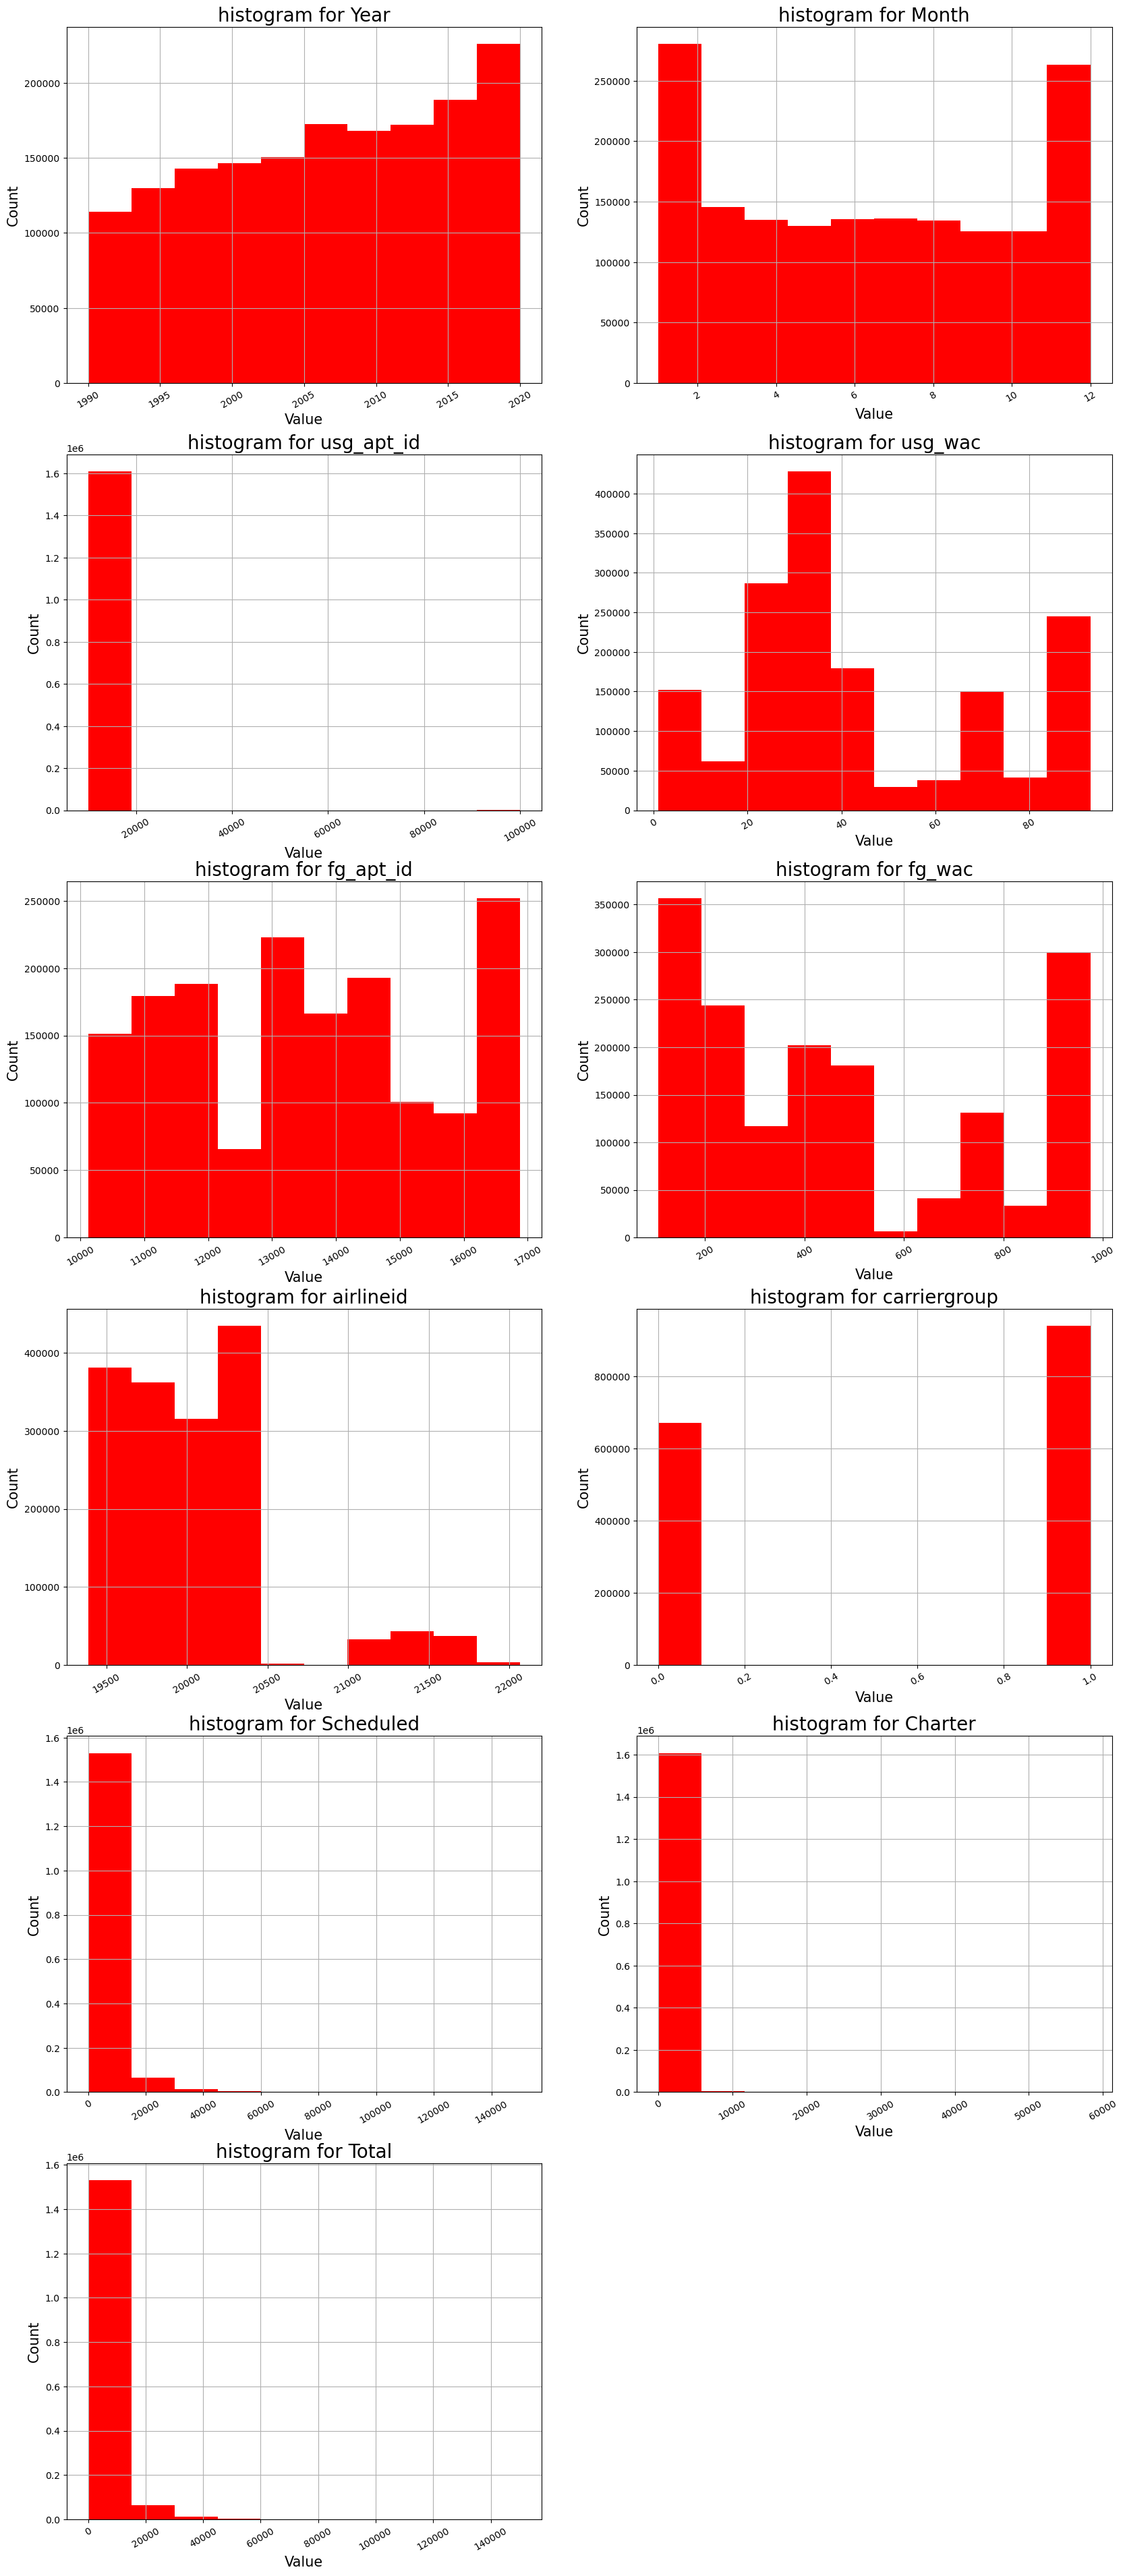

In [18]:
#numerical visualization hist
obj.numerical_visualization_hist(data)

d:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\New folder (2)\lib\site-packages\seaborn\_decorat

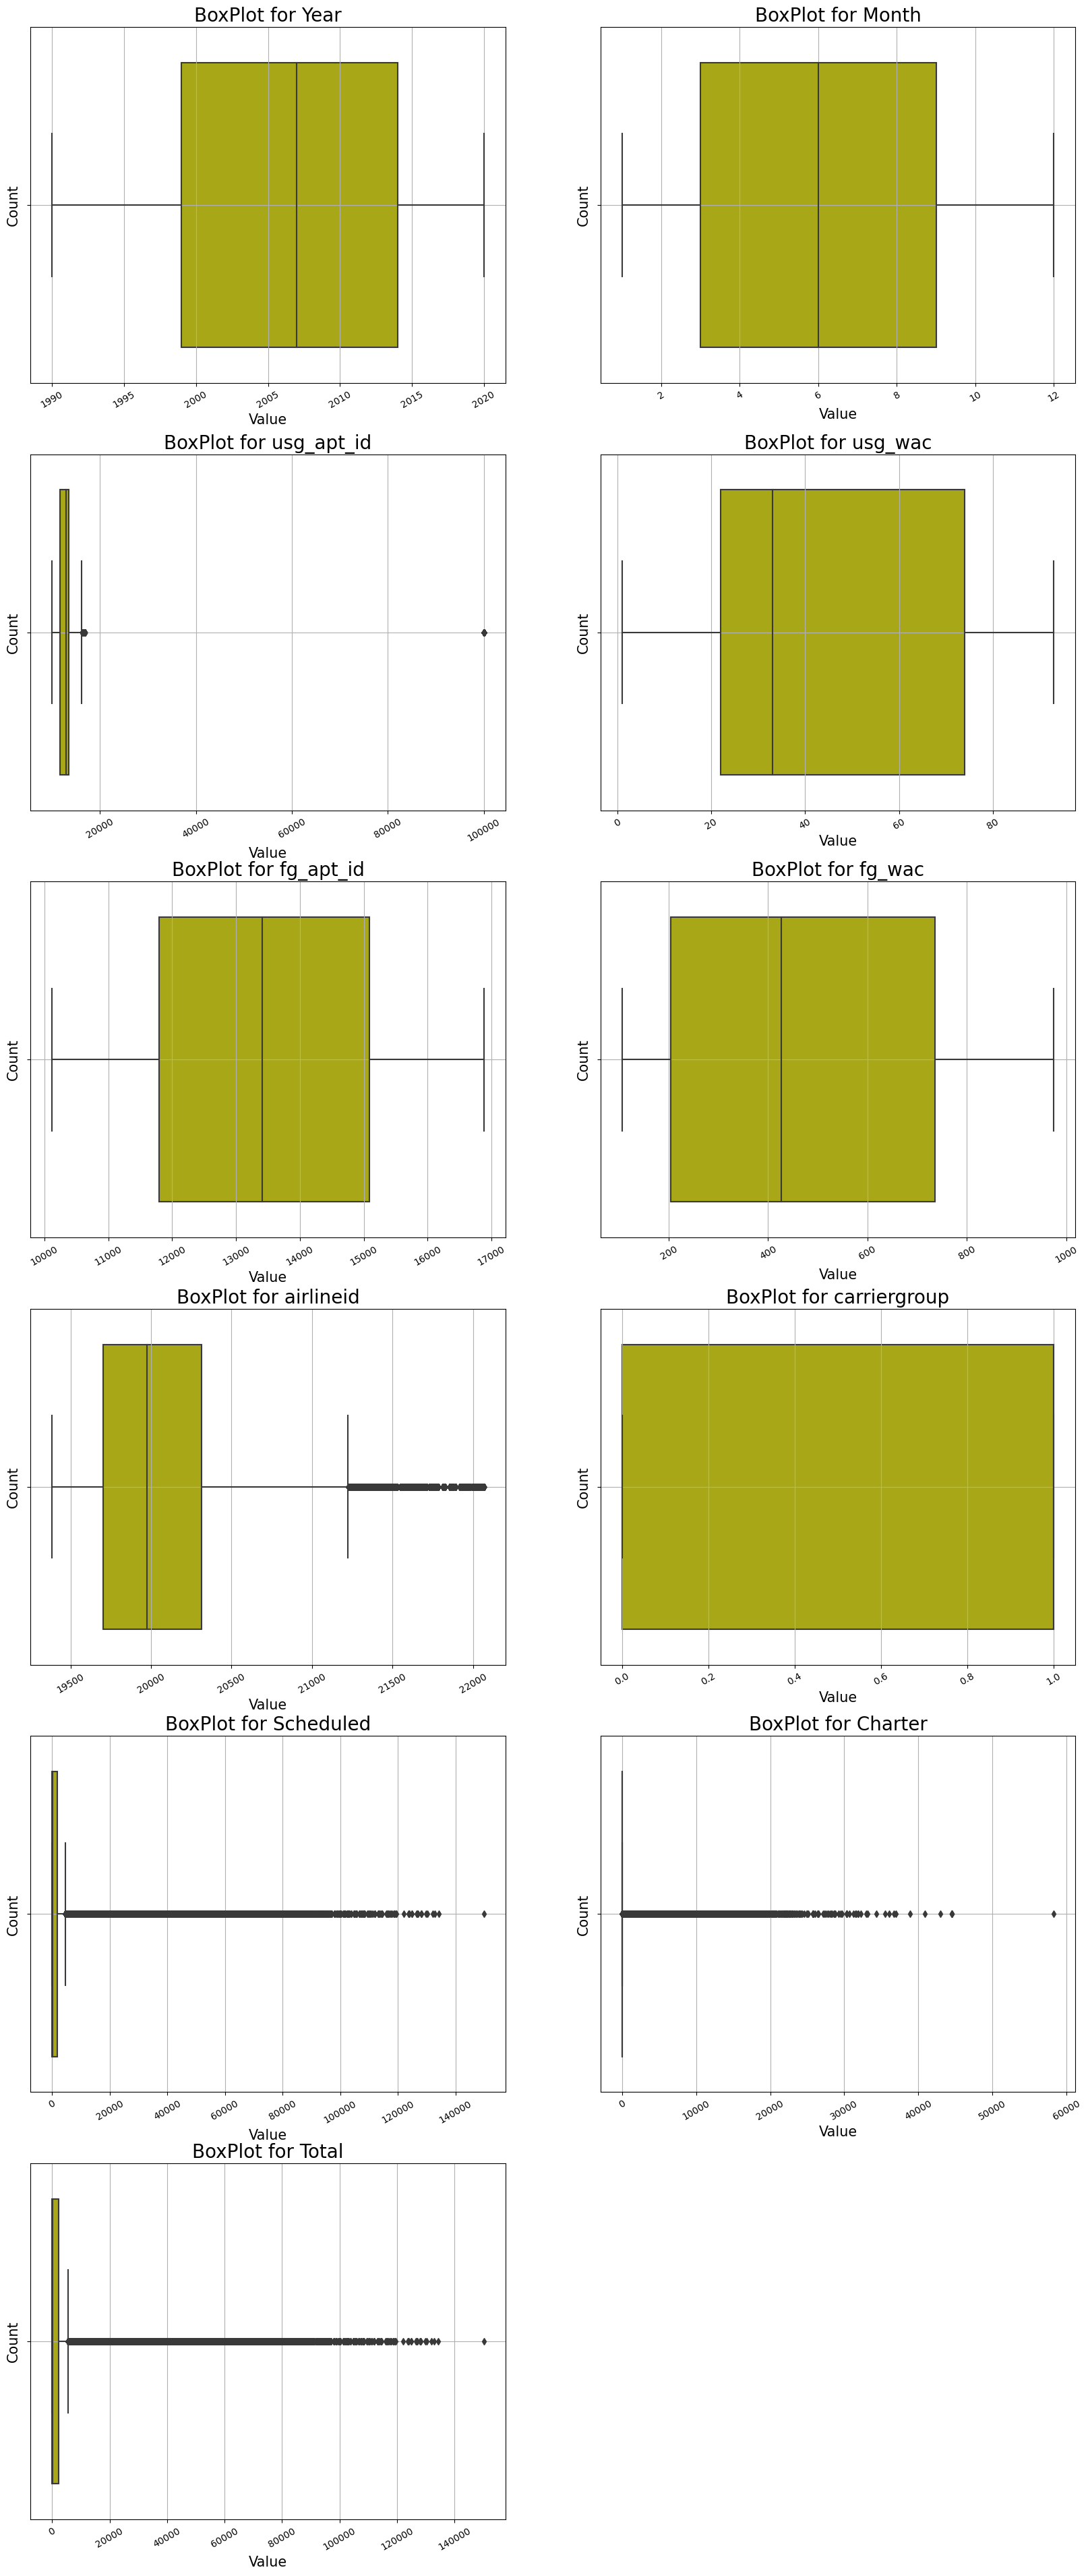

In [19]:
#numerical visualization box
obj.numerical_visualization_box(data)

d:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\New folder (2)\lib\site-packages\seaborn\_decorat

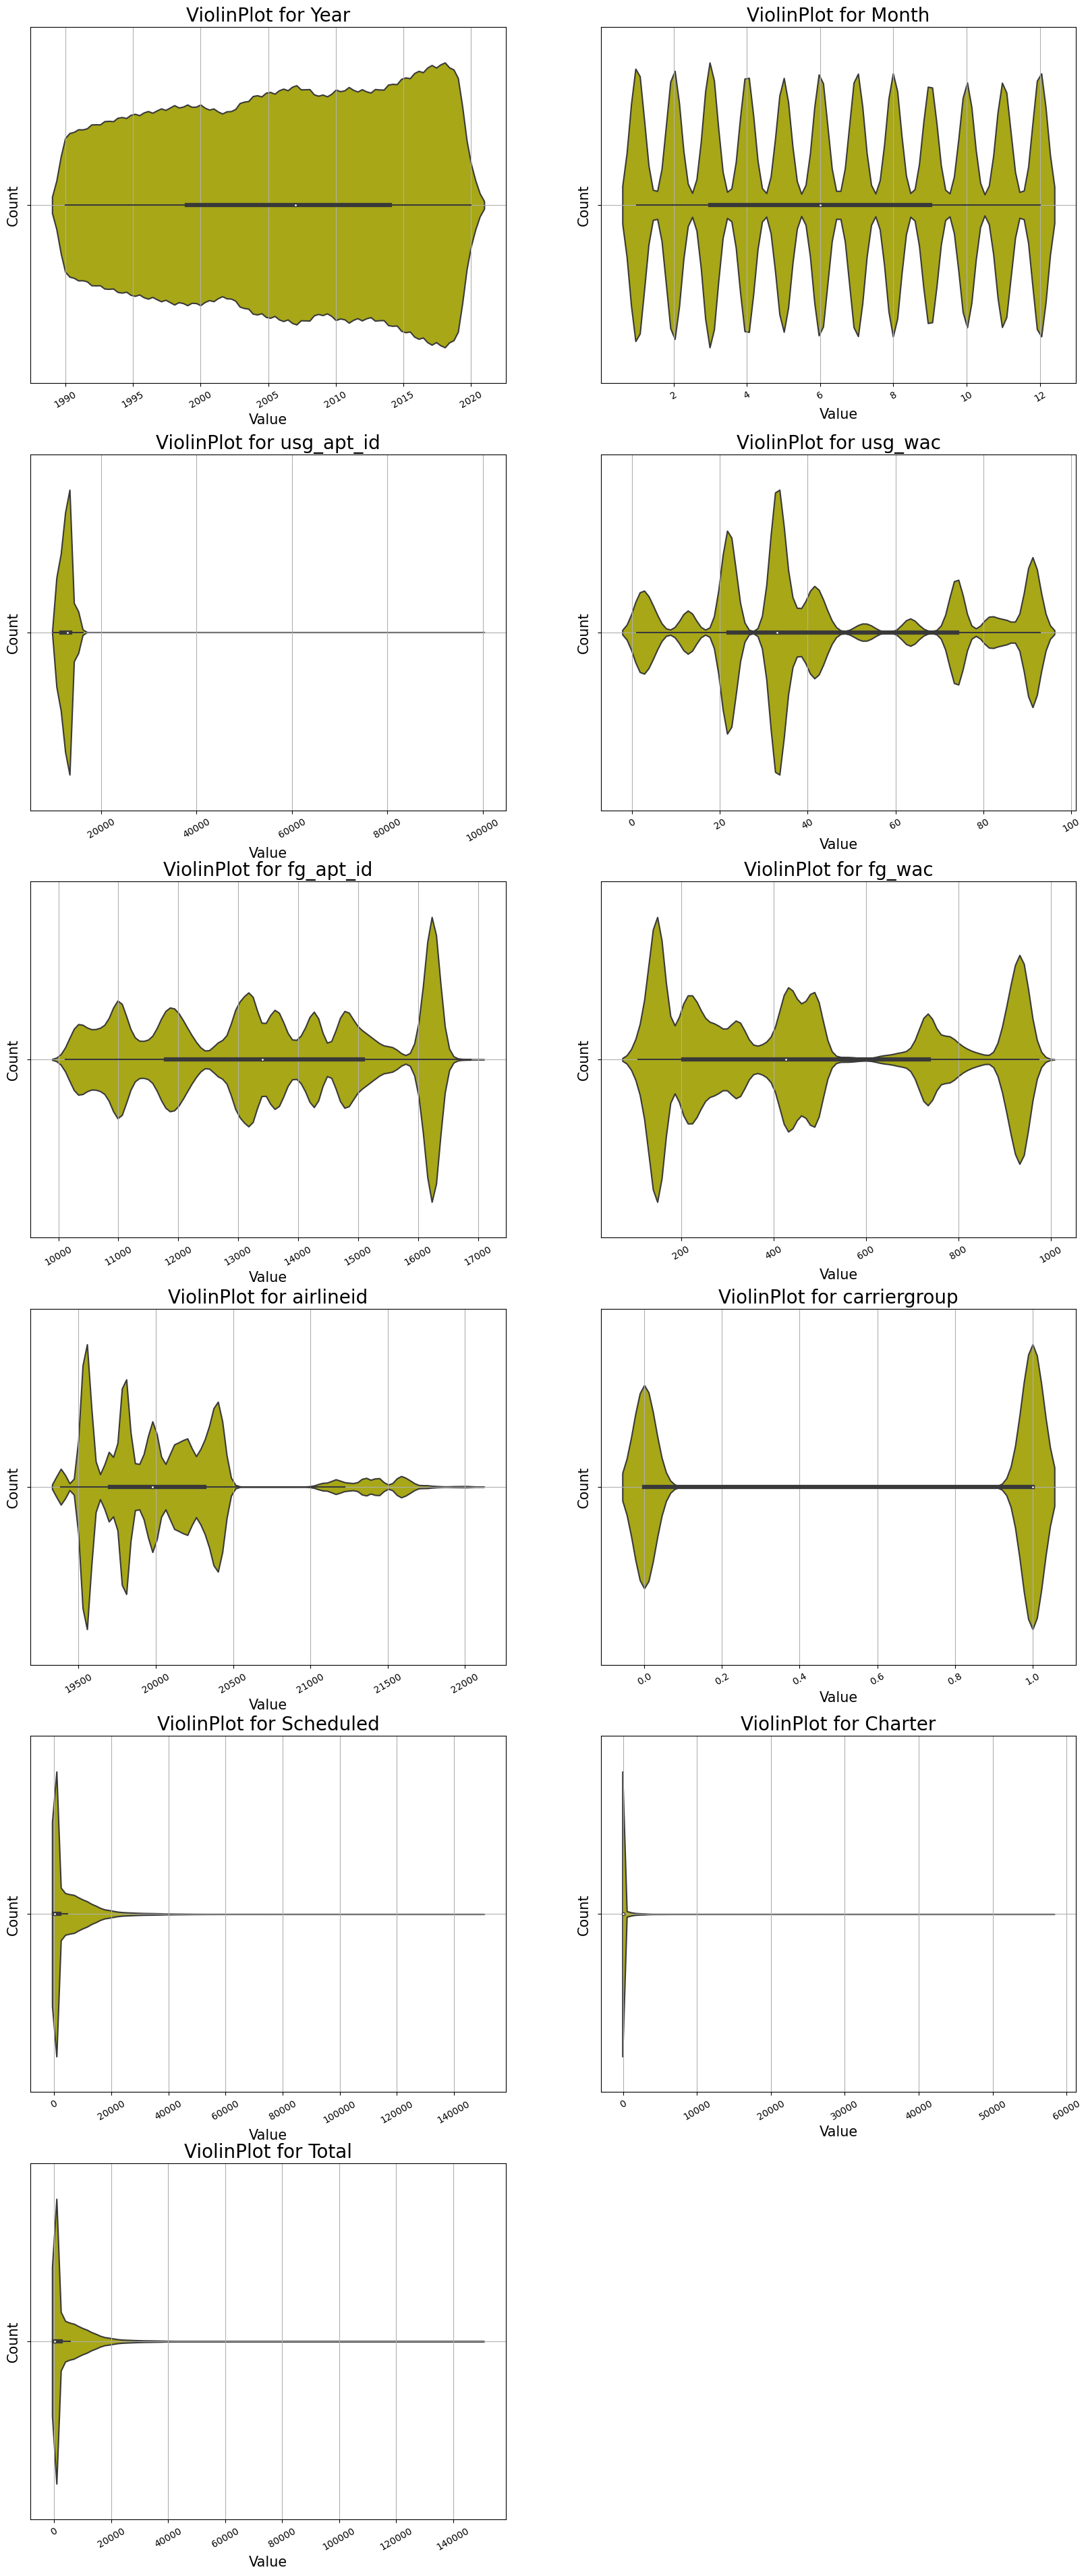

In [20]:
#numerical visualization violin
obj.numerical_visualization_violin(data)

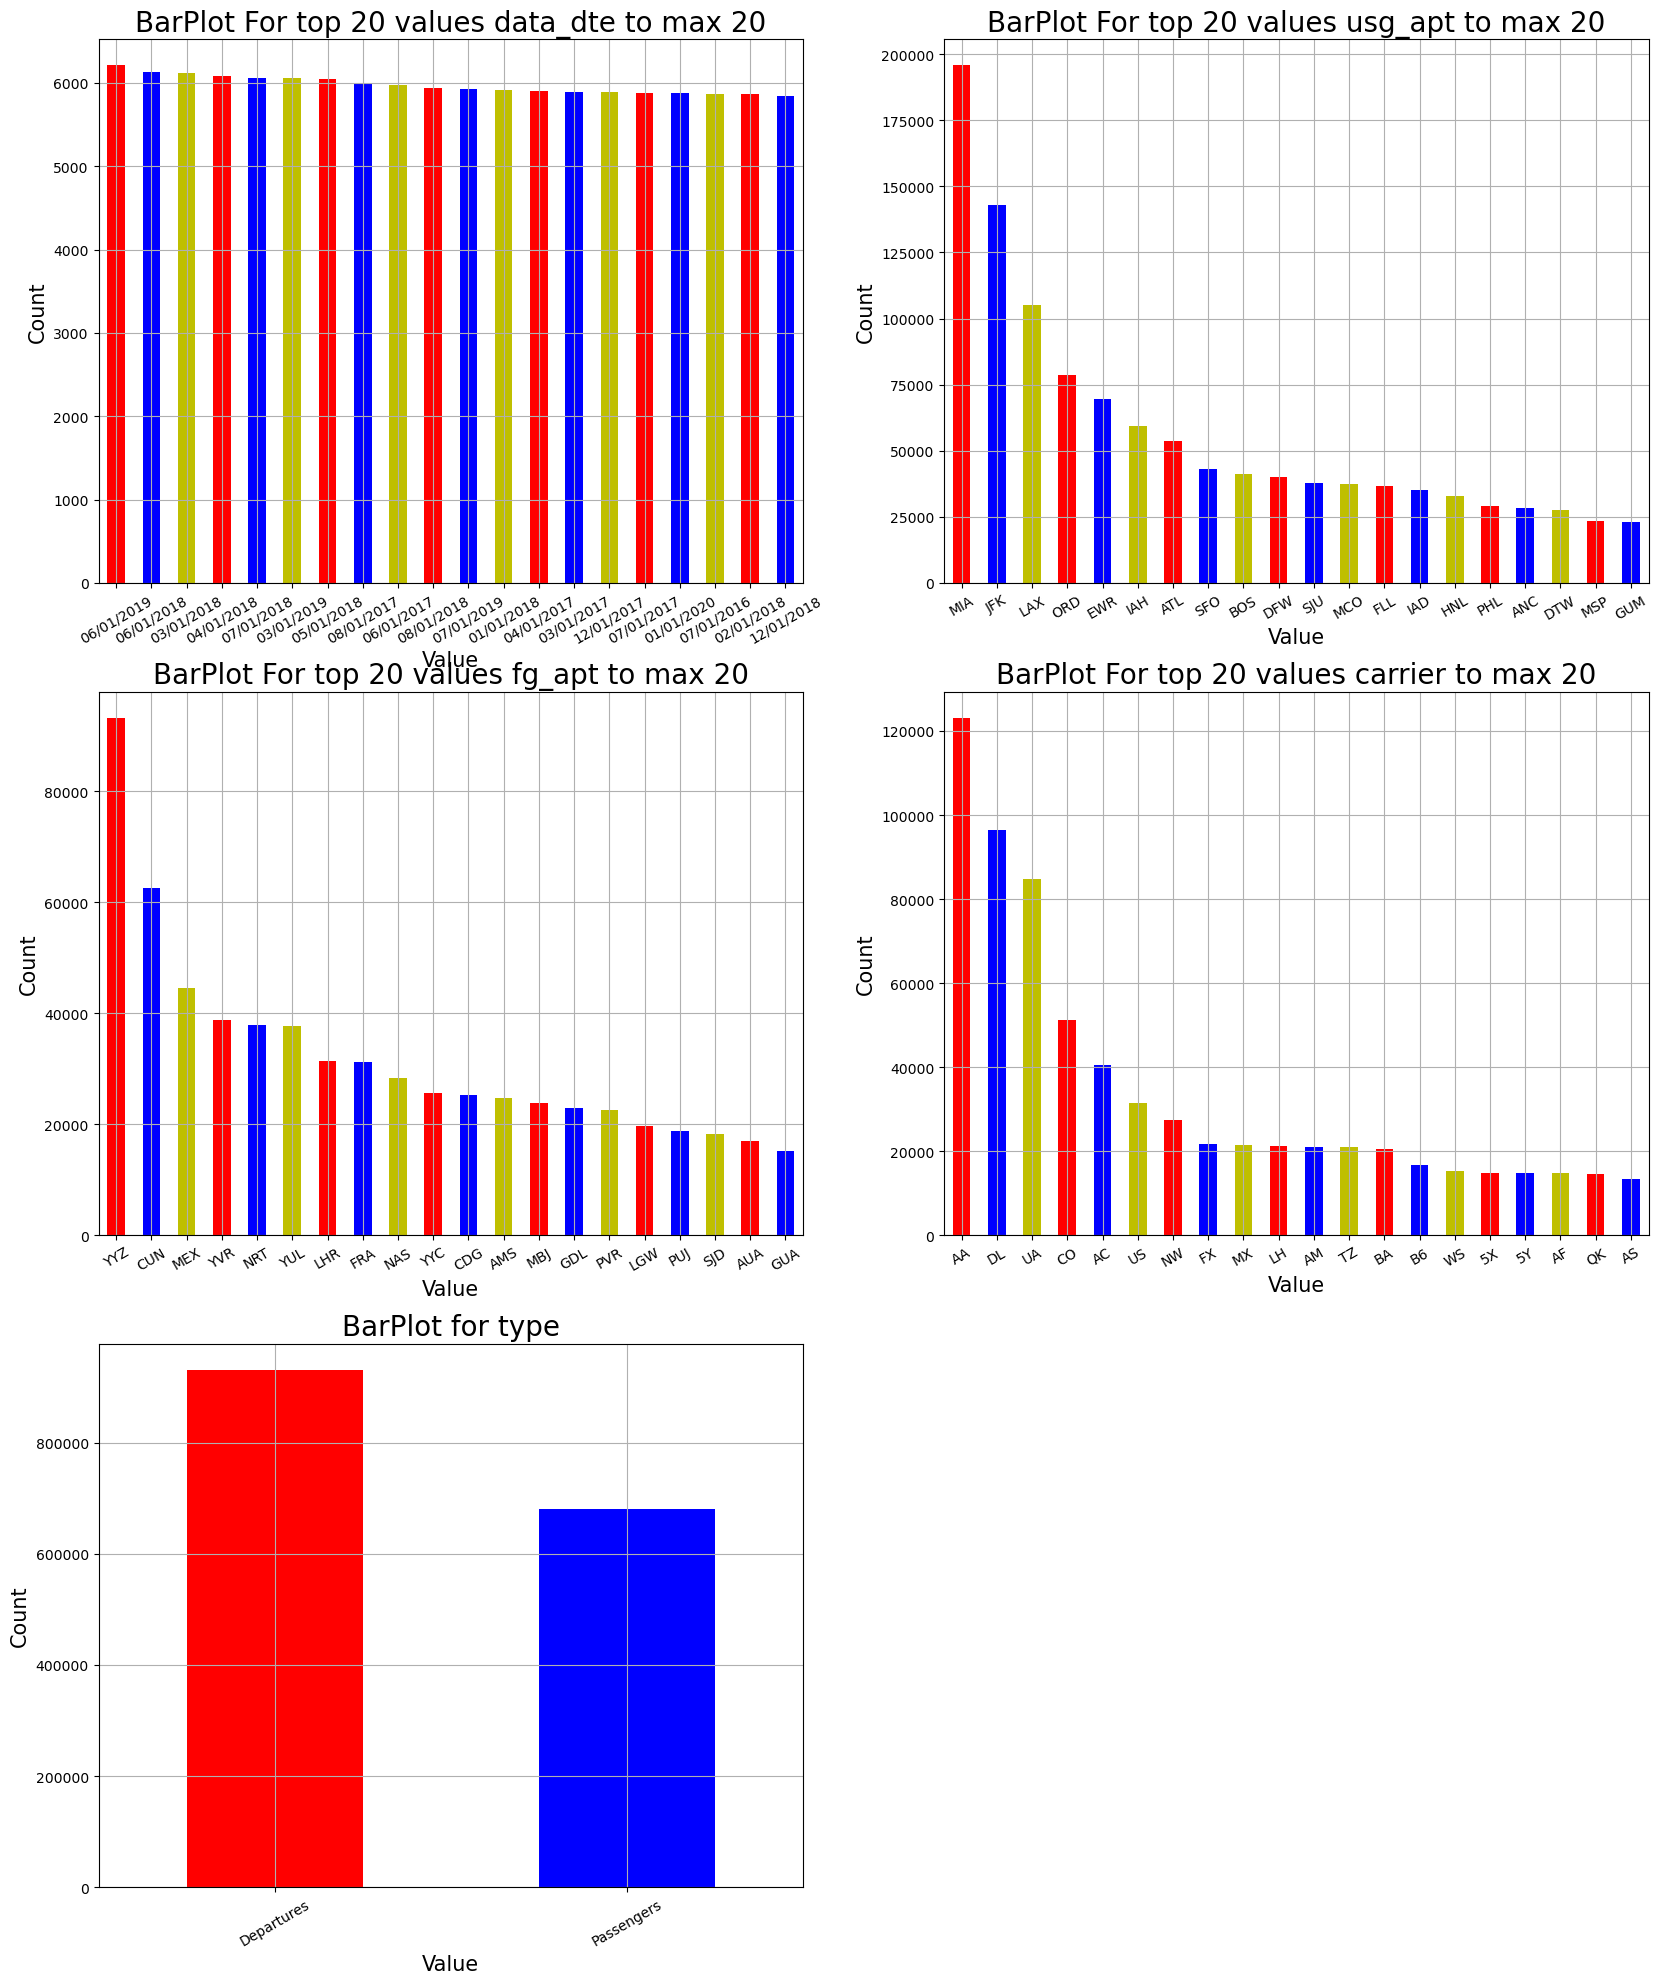

In [21]:
#categorical visualization bar
obj.categorical_visualization_bar(data)

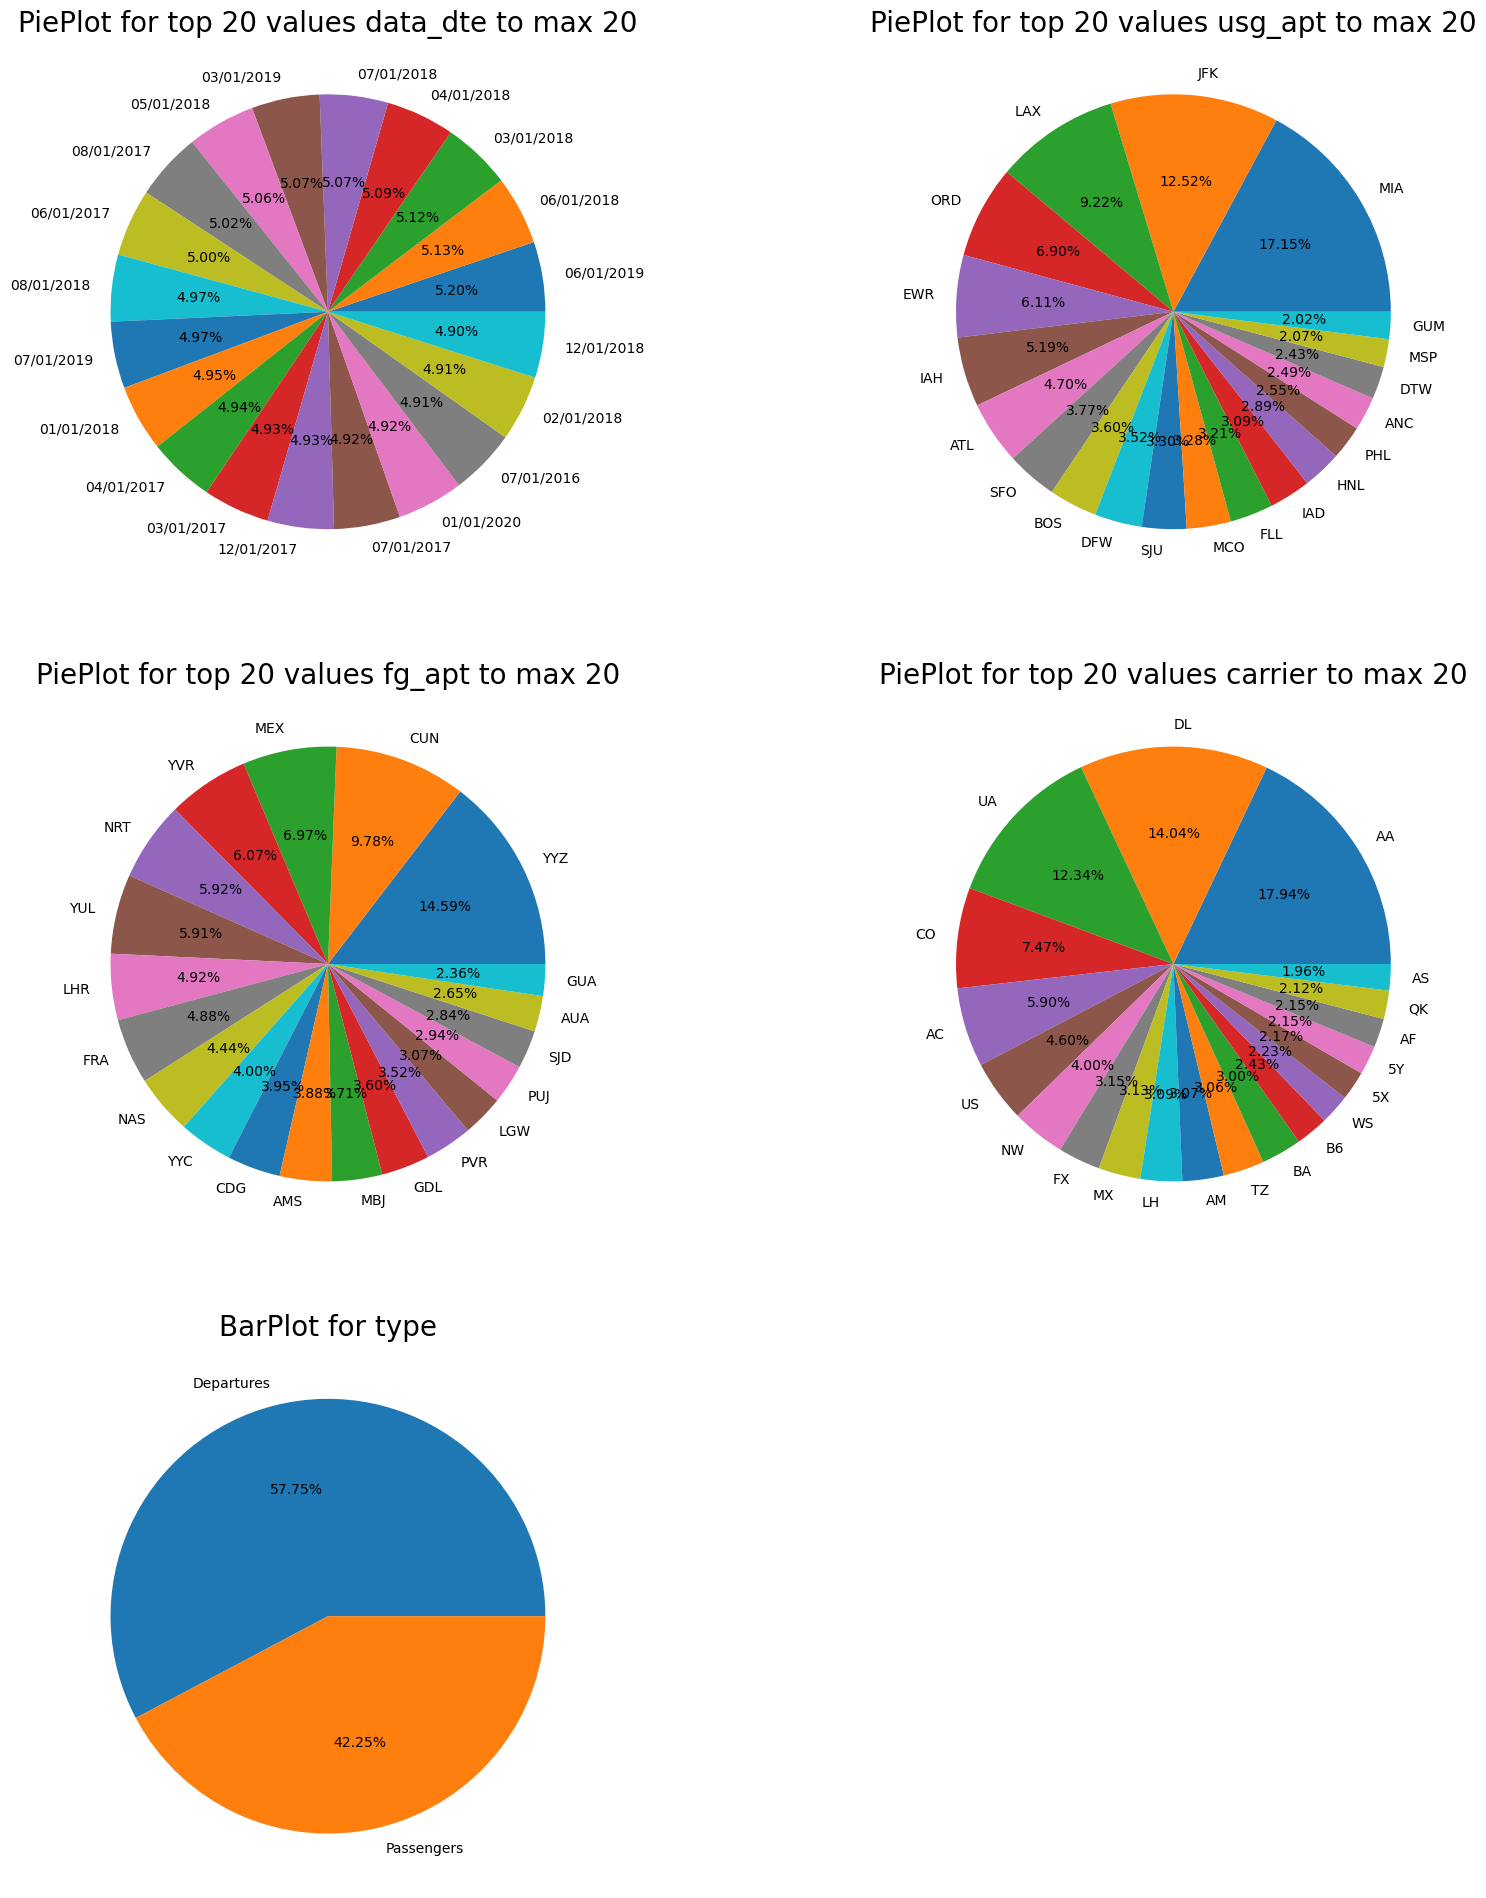

In [22]:
#categorical visualization pie
obj.categorical_visualization_pie(data)

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
Year,1.000000,-0.019216,0.005856,0.060539,0.052654,0.042081,0.320415,0.027587,0.061802,-0.083463,0.053690
Month,-0.019216,1.000000,-0.000640,-0.001235,-0.001293,0.019265,-0.004974,-0.010035,0.015738,-0.011978,0.014577
usg_apt_id,0.005856,-0.000640,1.000000,0.071555,0.032324,0.008888,0.049641,-0.020565,-0.014763,0.005555,-0.014227
usg_wac,0.060539,-0.001235,0.071555,1.000000,0.093406,-0.038292,-0.010583,-0.045822,0.036616,-0.008691,0.035784
fg_apt_id,0.052654,-0.001293,0.032324,0.093406,1.000000,0.518068,0.080258,-0.013446,-0.047500,-0.032886,-0.050725
fg_wac,0.042081,0.019265,0.008888,-0.038292,0.518068,1.000000,0.003763,-0.167746,0.050203,-0.039986,0.046325
airlineid,0.320415,-0.004974,0.049641,-0.010583,0.080258,0.003763,1.000000,0.101268,-0.151349,0.026793,-0.148798
carriergroup,0.027587,-0.010035,-0.020565,-0.045822,-0.013446,-0.167746,0.101268,1.000000,-0.060183,-0.010922,-0.061272
Scheduled,0.061802,0.015738,-0.014763,0.036616,-0.047500,0.050203,-0.151349,-0.060183,1.000000,-0.052858,0.995250
Charter,-0.083463,-0.011978,0.005555,-0.008691,-0.032886,-0.039986,0.026793,-0.010922,-0.052858,1.000000,0.044613


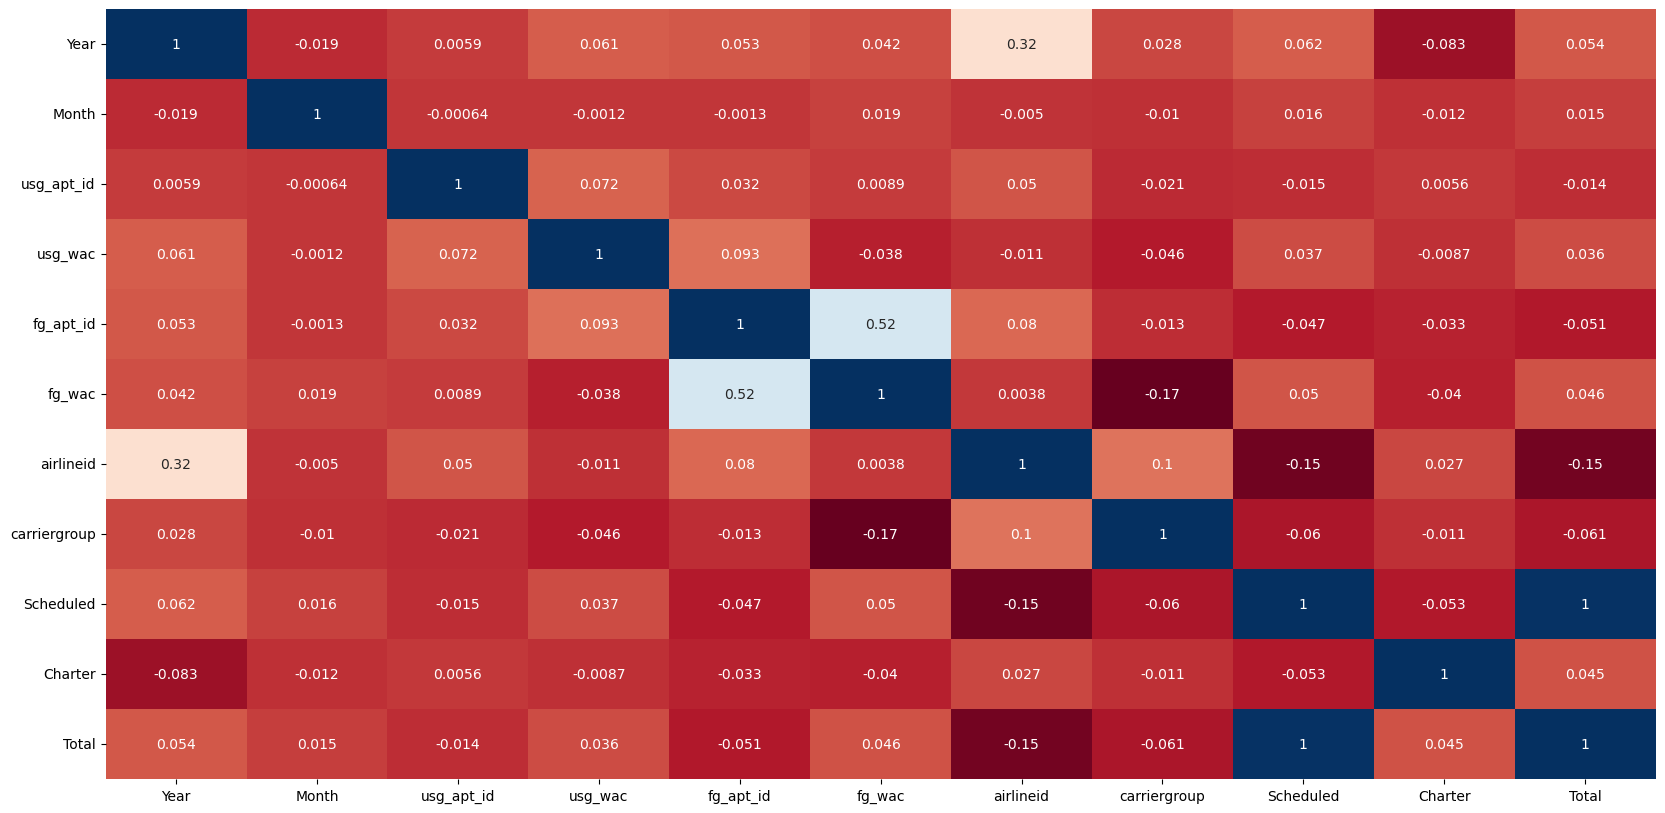

In [23]:
#heatmap for numerical
obj.heatmap_for_numerical(data)